In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
import os
import pickle
import random
import librosa
import librosa.display
import IPython
import tensorflow as tf
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn. preprocessing import StandardScaler
import librosa.display as lplt
from sklearn. preprocessing import LabelEncoder
from tensorflow import keras

In [34]:
df = pd. read_csv(r"C:/Users/nisha/Desktop/Music Genre/archive/Data/features_3_sec.csv")
df.head()
df.shape
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [35]:
df=df.drop(labels='filename',axis=1)

In [36]:
audio_folder = r"C:/Users/nisha/Desktop/Music Genre/archive/Data/genres_original/blues"
audio_files = [f for f in os.listdir(audio_folder) if f.endswith(".wav")]
random_file = random.choice(audio_files)
audio_recording = os.path.join(audio_folder, random_file)
data, sr = librosa.load(audio_recording, sr=45600)
print(type(data), type(sr))

<class 'numpy.ndarray'> <class 'int'>


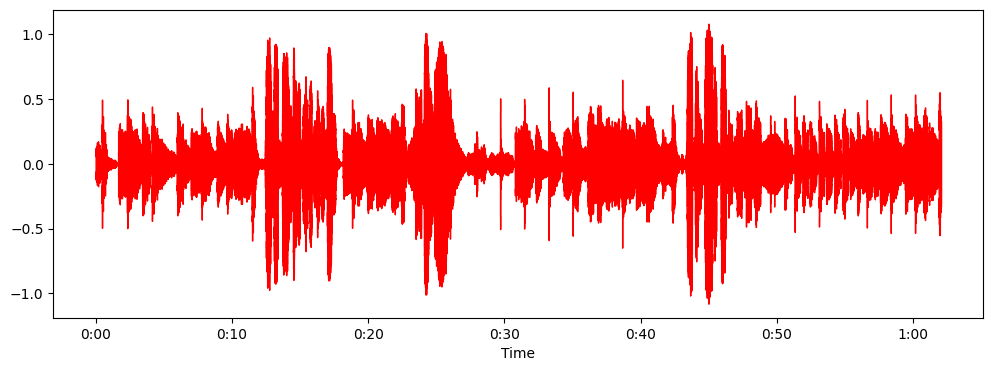

In [37]:
IPython.display.Audio(data, rate=sr)

plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, color = "red")
plt.show()

C:\Users\nisha\AppData\Local\Temp\ipykernel_18628\2670501552.py:4: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display. specshow(stft, sr=sr, x_axis='time', y_axis='hz')


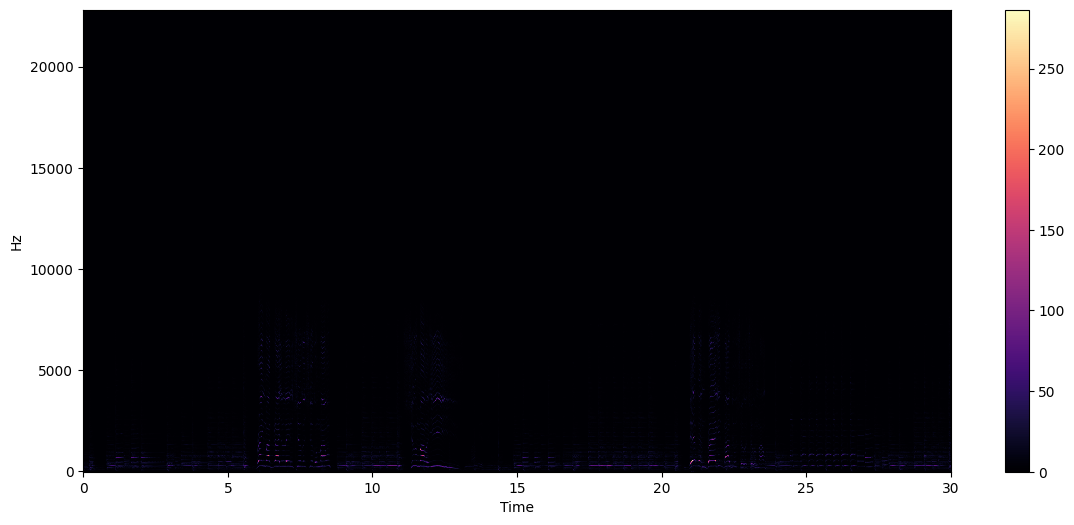

In [38]:
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14, 6))
librosa.display. specshow(stft, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

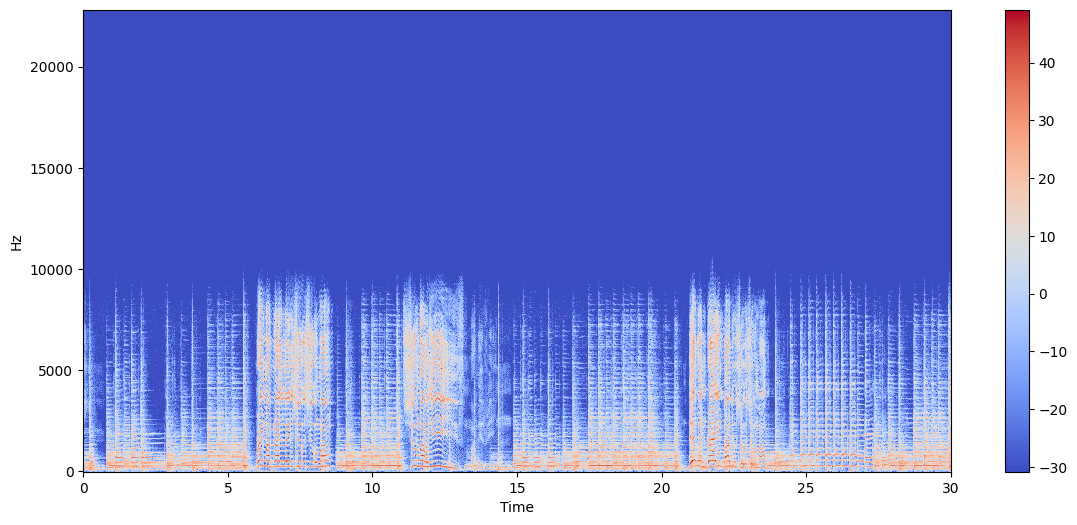

In [39]:
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14, 6))
librosa.display. specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

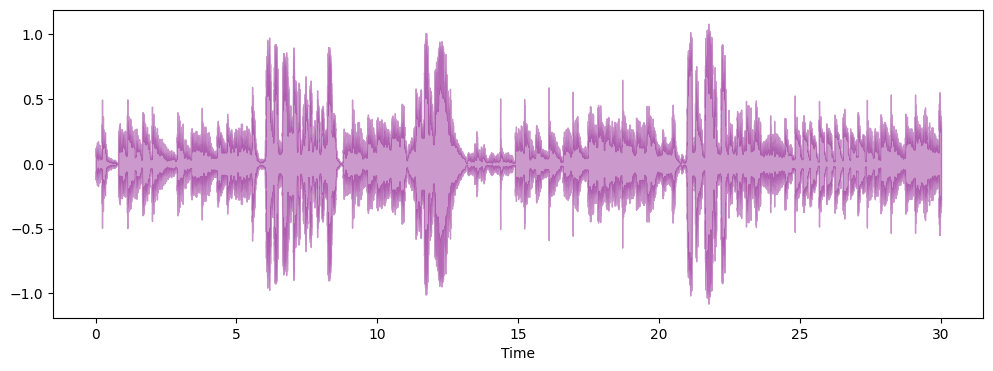

In [40]:
spectral_rolloff = librosa. feature.spectral_rolloff(y=data+0.01, sr=sr) [0]
plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sr, alpha=0.4, color = "purple")

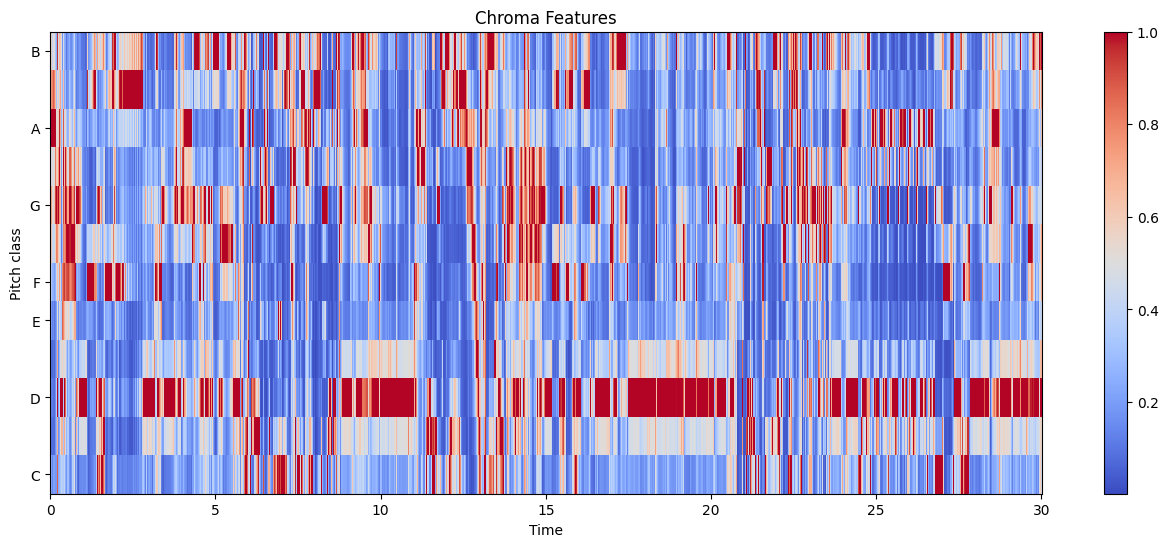

In [41]:
chroma = librosa.feature.chroma_stft(y=data, sr=sr)
plt.figure(figsize=(16,6))
lplt.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title("Chroma Features")
plt.show()

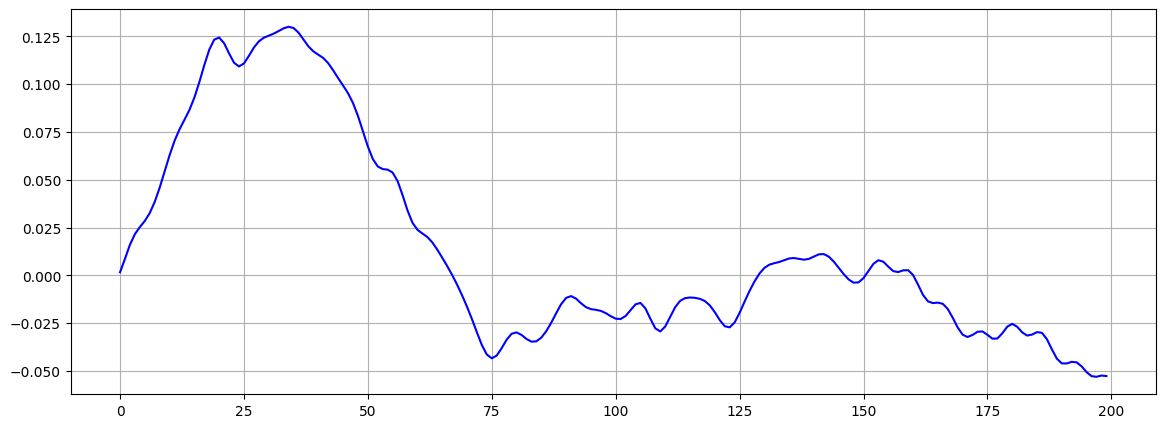

In [42]:
start = 1000
end = 1200
plt.figure(figsize=(14, 5))
plt.plot(data[start:end], color="blue")
plt.grid()

In [43]:
zero_cross_rate = librosa.zero_crossings(data[start:end], pad=False)
print("The number of zero-crossings is :",sum(zero_cross_rate))

The number of zero-crossings is : 5


In [44]:
class_list = df.iloc[:, -1]
convertor = LabelEncoder()

In [45]:
y = convertor. fit_transform(class_list)
y
print(df.iloc[:, :- 1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

In [19]:
fit = StandardScaler()
X = fit.fit_transform(np.array(df.iloc[:, :- 1], dtype = float))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
len(y_test)

3297

In [21]:
from keras.models import Sequential
#from keras.wrappers.scikit_learn import KerasClassifier

In [22]:
def trainModel(model, epochs, optimizer):
    batch_size = 128
    #callback = myCallback()
    model.compile(optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics='accuracy'
    )
    return model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs,
                    batch_size=batch_size)

def plotValidate(history):
    print("Validation Accuracy", max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [23]:
model = keras.models. Sequential([
    keras. layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    keras. layers.Dropout(0.2),

    keras. layers. Dense(256, activation='relu'),
    keras. layers. Dropout(0.2),

    keras. layers.Dense(128, activation='relu'),
    keras. layers. Dropout(0.2),

    keras. layers.Dense(64, activation='relu'),
    keras. layers.Dropout(0.2),

    keras. layers. Dense(10, activation='softmax'),

])
print(model.summary() )
model_history = trainModel(model=model, epochs=600, optimizer='adam')



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               30208     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                

In [24]:
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=128)
print("The test Loss is :", test_loss)
print("\nThe Best test Accuracy is :", test_acc*100)

26/26 [==============================] - 0s 2ms/step - loss: 0.6016 - accuracy: 0.9248
The test Loss is : 0.6015689373016357

The Best test Accuracy is : 92.47801303863525


In [25]:
model.save('classification')

INFO:tensorflow:Assets written to: classification\assets


INFO:tensorflow:Assets written to: classification\assets
